In [136]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [137]:
data = pd.read_csv('AAPL_quarterly_financials.csv')
data

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,\tSellingGeneralAndAdministration,"24,932,000,000","6,151,000,000","5,973,000,000","6,201,000,000","6,607,000,000","6,440,000,000","6,012,000,000","6,193,000,000","6,449,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,\tResearchAndDevelopment,"29,915,000,000","7,307,000,000","7,442,000,000","7,457,000,000","7,709,000,000","6,761,000,000","6,797,000,000","6,387,000,000","6,306,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,\tDepreciationAmortizationDepletionIncomeState...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,\t\tDepreciationAndAmortizationInIncomeStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,\tOtherOperatingExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
#sets name colunm to be the index
data.index = data.name

In [139]:
# cutting the data to only get basic eps row, then also cut out the first two rows
y = pd.DataFrame(data.loc['BasicEPS', :]).iloc[2:,:]
y

,BasicEPS
09/30/2023,1.47
06/30/2023,1.27
03/31/2023,1.53
12/31/2022,1.89
09/30/2022,1.29
...,...
09/30/1986,NaN
06/30/1986,0.002
03/31/1986,0.002
12/31/1985,0.004


In [140]:
# tells python that we are dealing with dates
y.index = pd.to_datetime(y.index)

In [146]:
#sorts collunmns from small to large, and fills NA's as zero
y = y.sort_index().fillna(0.)

In [147]:
# cut to match length
y = y[y.index >= '2003-09-30']

# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [320]:
from pytrends.request import TrendReq

In [312]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Tarriff", "Trade", "Samsung", "Macbook", "Money", "T-mobile", "Black" , "White", "Red"] 
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [313]:
df = df.resample("Q").mean()

In [314]:
df

,Tarriff,Trade,Samsung,Macbook,Money,T-mobile,Black,White,Red
date,,,,,,,,,
2004-03-31,73.000000,96.333333,25.000000,0.000000,44.666667,64.333333,37.333333,82.333333,63.666667
2004-06-30,74.666667,87.000000,24.000000,0.000000,41.666667,68.666667,34.666667,81.333333,63.666667
2004-09-30,74.333333,88.333333,27.333333,0.000000,40.666667,77.666667,34.666667,81.000000,64.666667
2004-12-31,82.000000,82.000000,30.000000,0.000000,43.000000,74.666667,32.666667,82.666667,73.333333
2005-03-31,77.000000,86.000000,29.000000,0.000000,45.000000,80.000000,33.000000,82.333333,66.000000
...,...,...,...,...,...,...,...,...,...
2023-03-31,23.333333,60.666667,57.666667,75.000000,68.666667,14.000000,44.666667,88.666667,69.333333
2023-06-30,20.333333,53.666667,53.333333,65.666667,66.666667,13.000000,44.333333,84.666667,65.666667
2023-09-30,22.000000,58.000000,59.000000,73.333333,66.666667,13.333333,45.333333,88.000000,70.666667


# 2.) Normalize all the X data

In [295]:
from sklearn.preprocessing import StandardScaler

In [296]:
scaler = StandardScaler()

In [297]:
X_scaled =scaler.fit_transform(df)



# 3.) Import data. Train, Test, Holdout (80%,15%,5%)

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size = 0.15, random_state = 42)

In [300]:
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_temp)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [301]:
from sklearn.linear_model import Lasso

In [326]:
#At an alpha of 0.5, no coefficients popped up, so i reduced it to 0.3. 
lasso = Lasso(alpha = 0.3)

In [327]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.3)

In [328]:
y_pred = lasso.predict(X_test_scaled)
y_pred

array([0.56659106, 0.39566107, 0.5081305 , 0.52893044, 0.47829423,
       0.54965028, 0.43714023, 0.77246976, 0.36698128, 0.43161604,
       0.66989948, 0.57259722, 0.71240605])

In [329]:
coeffs = lasso.coef_

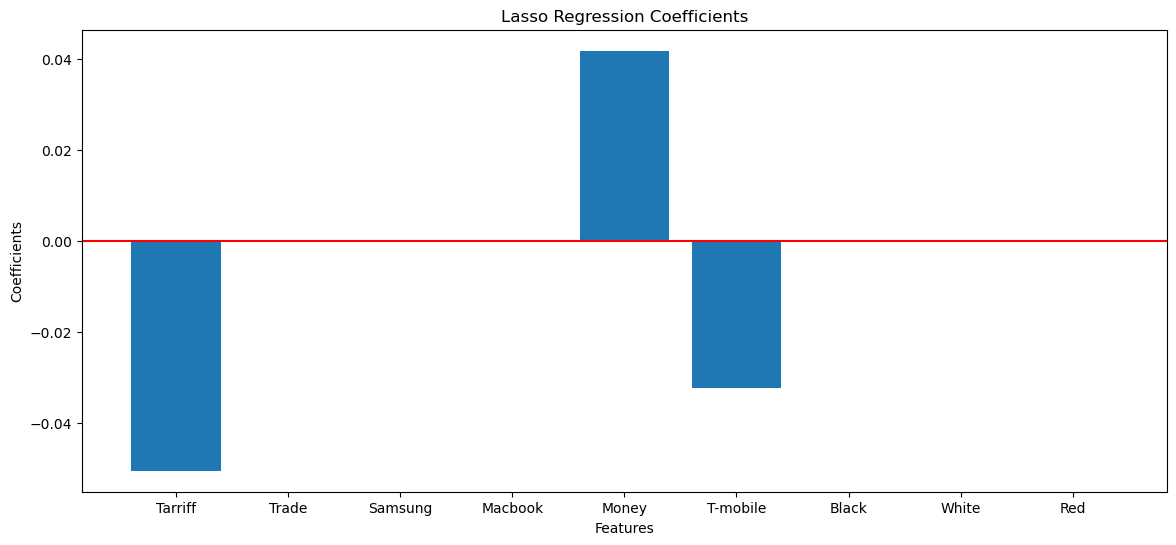

In [330]:
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.4  # Adjust the width of the bars
bar_spacing = 0.3  # Adjust the spacing between bars

# Calculate the positions for the bars
positions = range(len(df.columns))
positions_adjusted = [pos - bar_spacing/2 + bar_width/2 + i*bar_spacing for i, pos in enumerate(positions)]

plt.bar(df.columns, coeffs)
plt.axhline(0,color = "red")
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The coefficients do make sense
Tarriff, this coefficient is negitavely correated with Apple EPS, which is understandable considering tarriff would be bad for Apples earnings as they make their goods in other countries


Money, this is positively correlated, this is understandable because apple products are very expensive, and as people get more money, they can buy more apple products. 

T-mobile, this is a negitave correlation, this could be because t-mobile is a cheaper phone service, so as people switch to t-mobile, they may also be strapped for cash and less likely to buy an iphone. 

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?